In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Tirada de moneda

In [2]:
np.random.randint(2) # tiro la moneda una vez

1

In [3]:
np.random.randint(2,size = 10) # 10 tiradas de moneda

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

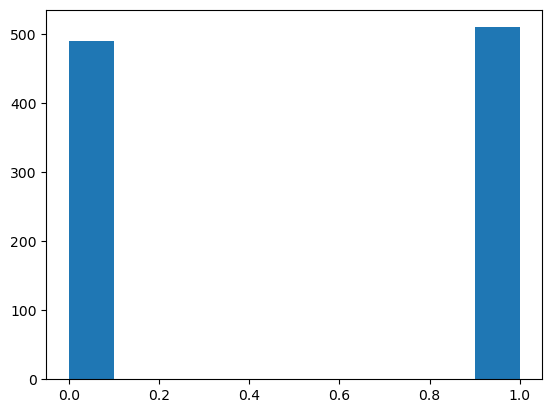

In [4]:
size = 1_000
results = np.random.randint(2,size = size)

plt.hist(results)
plt.show()

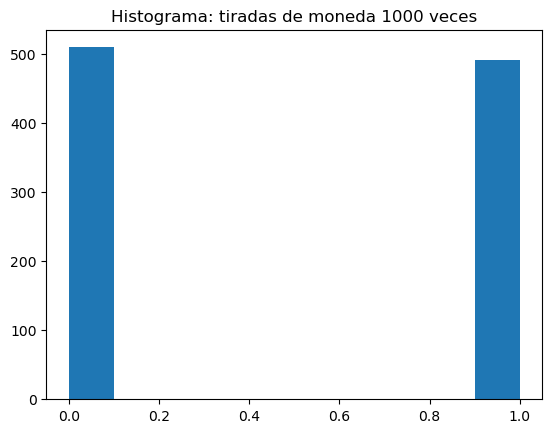

In [5]:
size = 1000
results = np.random.randint(2,size = size)

fig,ax = plt.subplots() 
ax.set_title(f"Histograma: tiradas de moneda {size} veces")
ax.hist(results)
plt.show()

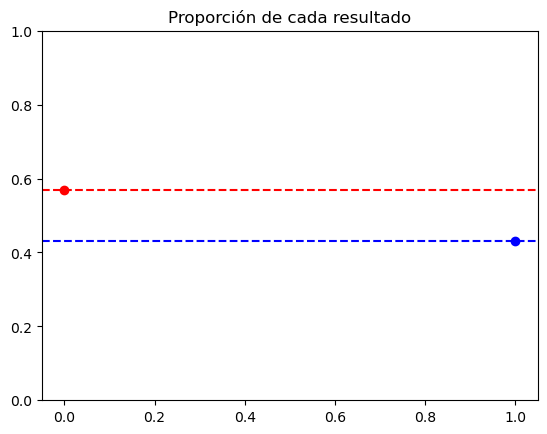

In [7]:
size = 100
results = np.random.randint(2, size=size)

x = np.unique(results)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = sum(results == x[i])
y = y / len(results)


plt.title("Proporción de cada resultado")
colors = ['red', 'blue']  
for i in range(len(x)):
    plt.scatter(x[i], y[i], color=colors[i])
    plt.axhline(y=y[i], color=colors[i], linestyle='--')

plt.ylim(0, 1)
plt.show()

In [8]:
#Una función que haga lo mismo que arriba para una tira de resultados cualquiera
def aproximar_pmf(results):
    size = len(results)
    x = np.unique(results)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = sum(results == x[i])
    y = y/size
    # Ploteo
    fig,ax = plt.subplots() 
    ax.scatter(x,y)
    ax.set_ylim(0,1)
    ax.set_title(f"Aproximación de la pmf con {size} samples")
    plt.show()

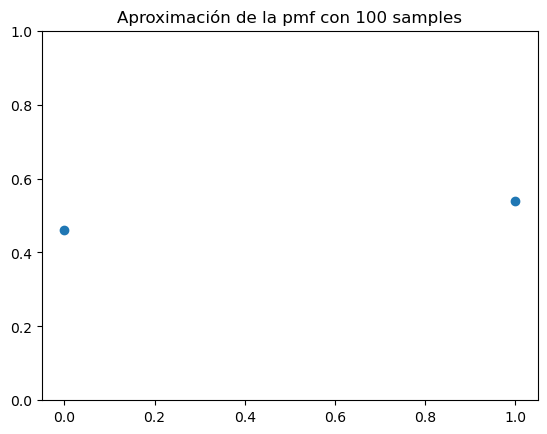

In [9]:
samples = np.random.randint(2,size = 100)
aproximar_pmf(samples)

Modelamos cada tirada de monedas como una *variable aleatoria* con **distribución Bernoulli**

$X \sim Bernoulli(p) $
experimento con dos resultados posibles: Éxito y Fracaso (cara y ceca)


$ X = 1 $ si éxito

$ X = 0 $ si fracaso


$P(E) = p$

$P(F) = P(E^{C}) = 1-p$

# Binomial

Repito varias veces un experimento de Bernoulli de forma independiente.

$X \sim Bi(n,p)$ es la cantidad de éxitos entre las n repeticiones, hay n resultados posibles


In [16]:
n = 3
p = 0.5
size = 10
samples = np.random.binomial(n, p, size)
print(samples)


[3 1 2 1 2 2 1 1 1 2]


In [23]:
# grafica la proporcion de resultados en cada repeticion
def aproximar_pmf(results):
    size = len(results)
    x = np.unique(results)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = sum(results == x[i])
    y = y / size
    
    # Ploteo
    fig, ax = plt.subplots()
    colors = plt.cm.viridis(np.linspace(0, 1, len(x)))  # Colores para cada valor único
    for i in range(len(x)):
        ax.scatter(x[i], y[i], color=colors[i])
        ax.axhline(y=y[i], color=colors[i], linestyle='--')
    
    ax.set_ylim(0, 1)
    ax.set_title(f"Aproximación de la pmf con {size} samples")
    plt.xlabel('Valores únicos')
    plt.ylabel('Proporción')
    plt.show()



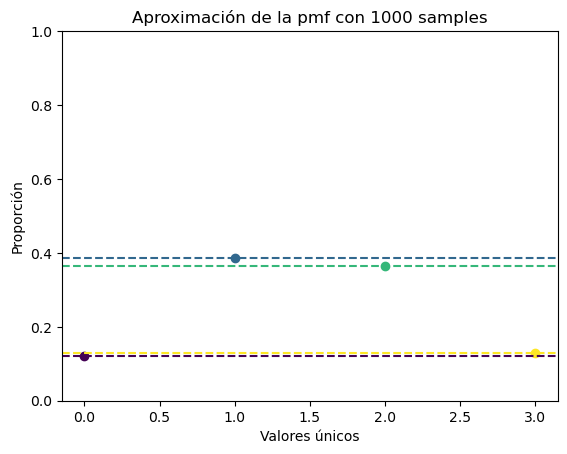

In [27]:
n, p, size = 3, 0.5, 1_000
samples =  np.random.binomial(n, p, size)
aproximar_pmf(samples)

In [28]:
from scipy.stats import binom
n, p = 3, 0.5
binomial = binom(n,p) 

In [30]:
binomial #el objeto contiene la infromacion que necesitamos sobre la distibucion particular

$$ p_X(x;p,n) =  {n \choose x} p^{x}(1-p)^{n-x} $$

In [31]:
binomial.pmf(3)

0.125

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


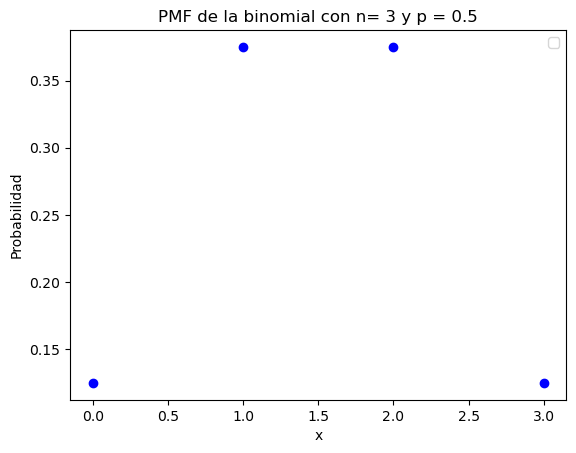

(0.0, 1.0)

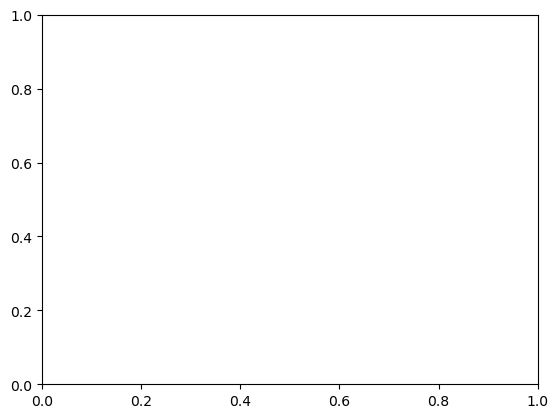

In [39]:
x = np.arange(4)
pmf = binom.pmf(x, n, p)
plt.title(f"PMF de la binomial con n= {n} y p = {p}")
plt.scatter(x, binomial.pmf(x), color='blue')
plt.xlabel('x')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()
plt.ylim(0,1)

# Suma de Bernoullis

In [17]:
p = 0.5
binom(1,p).rvs([3,12]) # tirar una moneda

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]])

In [141]:
N = 3 # N monedas
size = 10 # Cantidad de tiradas
p = 0.5 # la probabilidad de que salga cara 
threesample = binom(1,p).rvs([N,size])
print(threesample)


[[0 1 0 0 1 0 0 1 1 1]
 [1 0 1 1 1 1 0 1 1 1]
 [1 1 0 0 1 1 0 1 0 0]]


In [142]:
sample = np.sum(threesample,axis = 0)
sample

array([2, 2, 1, 1, 3, 2, 0, 3, 2, 2])

[1 2 2 2 1 1 1 2 3 2 3 1 1 2 0 3 3 2 2 1 1 2 1 1 1 1 2 2 2 1 2 2 3 1 3 0 3
 1 2 1 0 0 1 1 1 1 1 1 0 2 2 1 3 0 3 0 3 1 3 0 0 1 2 1 2 2 2 2 1 1 0 2 2 2
 0 2 3 0 2 1 1 2 2 0 2 0 1 1 1 2 3 1 2 2 0 1 2 1 2 3 1 2 2 1 1 2 2 2 1 1 2
 2 2 1 3 2 2 2 0 0 2 3 2 3 1 1 1 1 0 1 2 1 2 1 2 1 0 2 1 1 2 2 2 3 1 1 1 1
 1 2 1 2 0 1 1 1 2 2 1 0 2 2 1 3 3 2 2 1 2 1 1 3 1 1 1 1 1 1 3 2 3 1 2 2 0
 2 3 3 2 1 2 2 1 1 0 1 1 1 1 0 2 1 0 2 3 1 2 2 2 2 2 3 2 0 2 1 3 1 1 2 1 3
 1 1 0 0 2 2 3 3 2 2 1 2 2 3 3 1 3 1 0 2 3 0 2 2 2 2 1 2 3 2 1 2 2 1 2 1 0
 2 2 2 1 2 2 1 3 1 1 1 2 1 3 1 2 2 2 2 1 1 2 1 1 2 1 2 1 2 3 1 2 0 1 1 2 2
 1 2 2 1 1 1 2 2 0 1 1 1 3 3 2 0 3 2 2 3 3 3 2 2 3 2 2 2 2 0 2 2 2 1 2 0 2
 3 3 2 2 2 3 1 0 0 2 2 2 2 1 3 0 1 2 1 1 0 1 2 2 1 1 1 2 1 1 0 1 2 1 1 2 1
 0 1 0 3 2 2 1 3 1 1 2 1 2 3 3 2 2 2 2 1 1 3 1 3 0 0 2 3 3 2 2 0 0 1 2 0 0
 1 3 3 0 2 0 1 1 2 1 0 1 1 0 2 1 1 1 0 3 0 0 2 2 2 1 1 3 3 0 1 2 1 1 1 2 0
 2 2 1 0 0 0 1 1 2 2 1 1 1 2 3 2 2 2 1 2 1 3 1 1 1 2 1 2 1 1 1 2 2 2 2 2 1
 0 1 2 2 1 1 2 3 2 2 1 2 

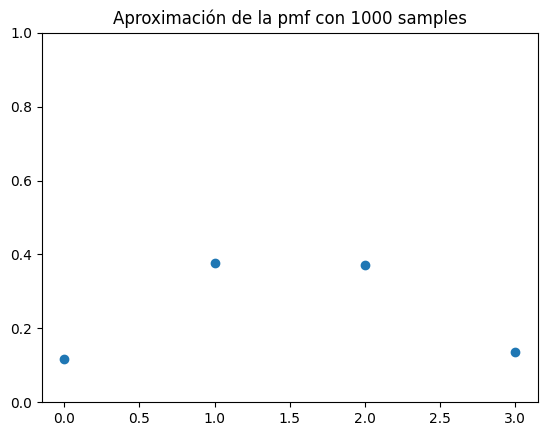

In [146]:
size = 1_000
threesample = binom(1,p).rvs([N,size])
sample = np.sum(threesample,axis = 0)
print(sample)
aproximar_pmf(sample)